There are many different parameters in every algorithm.
***

Decision Tree Classifiers
criteria,splitter,max_depth,min_samples_split,min_samples_leaf,min_weight_fractions_leaf,max_features,max_leaf_nodes,min_impurity_decrease,min_impurity_split,class_weight,presort
***
Random Forest Classifiers
criterion,n_estimators,max_depth,min_samples_slpit,min_samples_leaf,min_weight_fraction_leaf,max_features,max_leaf_nodes,min_impurity_decrease,min_impurity_split,class_weight
***
Support Vectors 
c, kernel,degree,gamma,coef0,shrinking,probability,tol,cache_size,class_weight,max_iter
***
Logistic Regression
penalty, dual, tol, C, l1_ratio,fit_intercept,intercept_scaling,class_weight,solver,max_iter.


These parameters are known as hyper parameters and can affect our model outcomes.
Hyper Parameter Tunning-> change the values of these parameters and see how our model is impacted by changing these values.

 !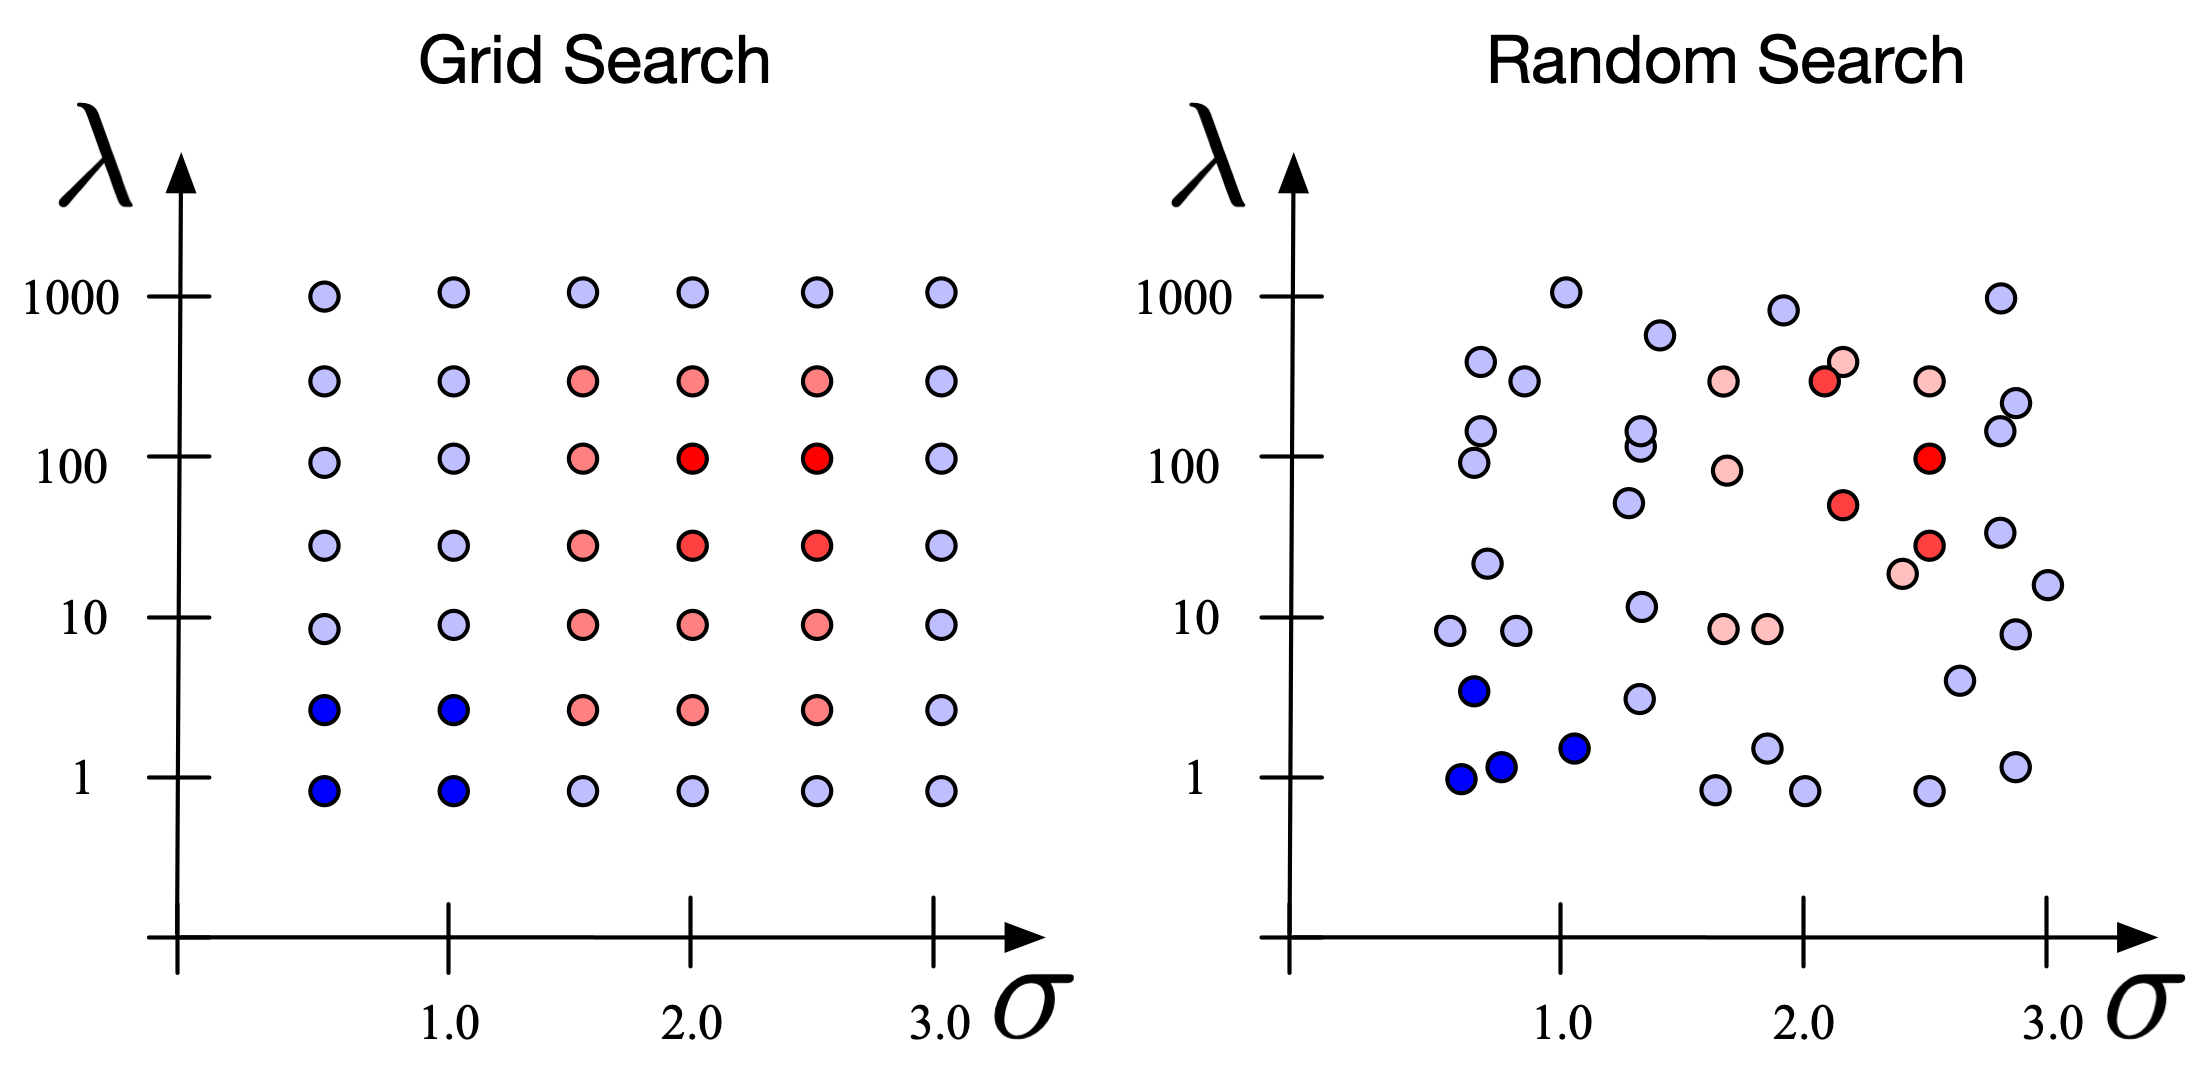

### Grid Search CV 

In [45]:
import pandas as pd

In [46]:
df=pd.read_csv('Downloads/04+-+decisiontreeAdultIncome.csv')

In [47]:
df

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K
1,28,Private,Bachelors,Married,Black,Female,40,<=50K
2,37,Private,Masters,Married,White,Female,40,<=50K
3,31,Private,Masters,Never-married,White,Female,50,>50K
4,42,Private,Bachelors,Married,White,Male,40,>50K
...,...,...,...,...,...,...,...,...
19782,53,Private,Masters,Married,White,Male,40,>50K
19783,22,Private,Some-college,Never-married,White,Male,40,<=50K
19784,40,Private,HS-grad,Married,White,Male,40,>50K
19785,58,Private,HS-grad,Widowed,White,Female,40,<=50K


In [48]:
# Create Dummy variables
data_prep = pd.get_dummies(df, drop_first=True)

# Create X and Y Variables
X = data_prep.iloc[:, :-1]
Y = data_prep.iloc[:, -1]

# Import and create Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1234)

# Import and create Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(kernel='rbf',gamma=0.5)

# Import and create Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1234)

# Import and create Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=1234)

In [49]:
#perfroming the cross validation
from sklearn.model_selection import cross_validate
cv_results_dtc=cross_validate(dtc,X,Y,cv=10,return_train_score=True)
cv_results_rfc=cross_validate(rfc,X,Y,cv=10,return_train_score=True)
cv_results_svc=cross_validate(svc,X,Y,cv=10,return_train_score=True)
cv_results_lrc=cross_validate(lrc,X,Y,cv=10,return_train_score=True)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [50]:
cv_results_dtc

{'fit_time': array([0.05800843, 0.04098701, 0.04200411, 0.03471112, 0.04699349,
        0.03997827, 0.04399896, 0.03509331, 0.03299594, 0.03299356]),
 'score_time': array([0.00400472, 0.00610042, 0.00199389, 0.00199509, 0.0029006 ,
        0.00401831, 0.00300097, 0.00199127, 0.00199056, 0.00201511]),
 'test_score': array([0.77261243, 0.77059121, 0.78170793, 0.75593734, 0.78878221,
        0.79535119, 0.78676099, 0.79271992, 0.77704752, 0.78918099]),
 'train_score': array([0.90408805, 0.90571653, 0.90380728, 0.90571653, 0.90358266,
        0.90380728, 0.90380728, 0.90414959, 0.90532877, 0.90353192])}

In [51]:
#getting average of all the results

In [52]:
import numpy as np

In [53]:
dtc_test_avg=np.average(cv_results_dtc['test_score'])
rfc_test_avg=np.average(cv_results_rfc['test_score'])
svc_test_avg=np.average(cv_results_svc['test_score'])
lrc_test_avg=np.average(cv_results_lrc['test_score'])

In [54]:
dtc_train_avg=np.average(cv_results_dtc['train_score'])
rfc_train_avg=np.average(cv_results_rfc['train_score'])
svc_train_avg=np.average(cv_results_svc['train_score'])
lrc_train_avg=np.average(cv_results_lrc['train_score'])

In [55]:
print(f'Decision Tree: Testing {dtc_test_avg} Training {dtc_train_avg}')
print(f'Random Forest CLassifier: Testing {rfc_test_avg} Training {rfc_train_avg}')
print(f'Support Vector Classifier: Testing {svc_test_avg} Training {svc_train_avg}')
print(f'Logistic Regression: Testing {lrc_test_avg} Training {lrc_train_avg}')

Decision Tree: Testing 0.7810691737459707 Training 0.9043535882172298
Random Forest CLassifier: Testing 0.7971904185045097 Training 0.9042918191721612
Support Vector Classifier: Testing 0.8036085674097743 Training 0.8744798848765454
Logistic Regression: Testing 0.8140702604853489 Training 0.814142844202309


In [56]:
#lets now do parameter tunning

In [57]:

# Import and create Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1234)

# Import and create Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(random_state=1234)

# Import and create Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1234)

# Import and create Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=1234)

now all models have same parameters. Lets hypertune them now

In [58]:
from sklearn.model_selection import GridSearchCV

estimator is the model which we are going to hypertune.
param_grid are the parameters we want to tune.
scoring-> the metric we want to jugde on accuracy, precision, auc etc.

grid search also performs the cross validation for the set of params given

Implementation

In [59]:
#creating parameter grid for random forest
#it should always be a dictionary.
rfc_params={'n_estimators':[10,5,20],
          'min_samples_split':[8,16],
           'min_samples_leaf':[1,2,3,4,5]} #the keys should match the parameters of the model


In [60]:
#total possible combinations of parameters-> 3*2*5=30 models 

In [61]:
rfc_gridcv=GridSearchCV(estimator=rfc,
                        param_grid=rfc_params,
                        scoring='accuracy',
                        cv=10,
                       return_train_score=True)
#30*10=300 models only for rfc 

In [62]:
#lets now fit the data we have assigned
rfc_grid_fit=rfc_gridcv.fit(X,Y)

In [63]:
#getting the results
cv_results_rfc=rfc_grid_fit.cv_results_

In [64]:
cv_results_rfc

{'mean_fit_time': array([0.1307673 , 0.06871774, 0.27557578, 0.15330248, 0.08703163,
        0.26163459, 0.1328321 , 0.07035301, 0.2480242 , 0.10665729,
        0.05902743, 0.25764861, 0.10305302, 0.05151737, 0.21163497,
        0.11215489, 0.06304331, 0.23862674, 0.1359463 , 0.07634788,
        0.22182701, 0.10617311, 0.06863751, 0.19361784, 0.09962549,
        0.04915452, 0.19245505, 0.10017326, 0.05257907, 0.21152258]),
 'std_fit_time': array([0.01446815, 0.00841323, 0.03567041, 0.0202417 , 0.01251891,
        0.03266428, 0.02332394, 0.00943674, 0.04187731, 0.00918945,
        0.00702392, 0.080508  , 0.00951319, 0.00398485, 0.02584489,
        0.01195941, 0.00722979, 0.03248484, 0.02492989, 0.00562616,
        0.02028145, 0.01891866, 0.00905901, 0.01976519, 0.01118876,
        0.00612864, 0.0123074 , 0.01659363, 0.00913978, 0.02019217]),
 'mean_score_time': array([0.00799732, 0.00579343, 0.01535788, 0.00983598, 0.00794961,
        0.01512623, 0.00994794, 0.00609596, 0.01460462, 0.00

In [65]:
#results in form of dictionary
cv_results_2=pd.DataFrame.from_dict(cv_results_rfc)

In [66]:
cv_results_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.130767,0.014468,0.007997,0.001915,1,8,10,"{'min_samples_leaf': 1, 'min_samples_split': 8...",0.790803,0.792319,...,0.869834,0.872642,0.870845,0.870227,0.870788,0.870459,0.871919,0.869167,0.870920,0.001005
1,0.068718,0.008413,0.005793,0.000752,1,8,5,"{'min_samples_leaf': 1, 'min_samples_split': 8...",0.793835,0.788782,...,0.864274,0.867644,0.866465,0.865903,0.864724,0.865854,0.867146,0.865349,0.866062,0.001071
2,0.275576,0.035670,0.015358,0.002903,1,8,20,"{'min_samples_leaf': 1, 'min_samples_split': 8...",0.798888,0.791814,...,0.872642,0.875449,0.874775,0.873821,0.873315,0.872312,0.874277,0.873716,0.873969,0.001056
3,0.153302,0.020242,0.009836,0.002084,1,16,10,"{'min_samples_leaf': 1, 'min_samples_split': 1...",0.801920,0.799899,...,0.856357,0.859614,0.856974,0.857087,0.856862,0.857207,0.858723,0.856870,0.857392,0.001058
4,0.087032,0.012519,0.007950,0.001425,1,16,5,"{'min_samples_leaf': 1, 'min_samples_split': 1...",0.800404,0.797878,...,0.852538,0.854616,0.853549,0.853830,0.853493,0.852771,0.855410,0.853220,0.853703,0.000816
5,0.261635,0.032664,0.015126,0.004555,1,16,20,"{'min_samples_leaf': 1, 'min_samples_split': 1...",0.800910,0.801415,...,0.859277,0.860961,0.859558,0.857985,0.858771,0.858274,0.859734,0.860127,0.859599,0.001225
6,0.132832,0.023324,0.009948,0.001623,2,8,10,"{'min_samples_leaf': 2, 'min_samples_split': 8...",0.805457,0.798383,...,0.857536,0.860400,0.857480,0.855346,0.857087,0.855298,0.858218,0.857151,0.857639,0.001506
7,0.070353,0.009437,0.006096,0.000710,2,8,5,"{'min_samples_leaf': 2, 'min_samples_split': 8...",0.807984,0.796867,...,0.854111,0.856020,0.853942,0.850629,0.851696,0.851199,0.853726,0.852883,0.853142,0.001572
8,0.248024,0.041877,0.014605,0.004248,2,8,20,"{'min_samples_leaf': 2, 'min_samples_split': 8...",0.804952,0.803941,...,0.858715,0.860624,0.860344,0.858322,0.859164,0.857375,0.859622,0.858611,0.859509,0.001232
9,0.106657,0.009189,0.007319,0.001489,2,16,10,"{'min_samples_leaf': 2, 'min_samples_split': 1...",0.813037,0.799394,...,0.848327,0.849450,0.848832,0.847765,0.847428,0.848167,0.848897,0.848784,0.848587,0.000792


gridsearch for logistic regression

In [70]:
lrc_params={'C':[0.01,0.1,0.5,1,2,5,10],
           'penalty':['l2'],
           'solver':['liblinear','lbfgs','saga']}
#total number of combinations-> 7*1*3=21
#using a 10 fold we have 210 jobs

In [71]:
lrc_gridcv=GridSearchCV(estimator=lrc,
                        param_grid=lrc_params,
                        scoring='accuracy',
                        cv=10,
                       return_train_score=True)


In [72]:
lrc_gridcv_fit=lrc_gridcv.fit(X,Y)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [73]:
#getting the results
cv_results_lrc=lrc_gridcv_fit.cv_results_
cv_results_3=pd.DataFrame.from_dict(cv_results_lrc)

In [74]:
cv_results_3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.050498,0.018956,0.002304,0.000645,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.805457,0.791814,...,0.810085,0.812444,0.810647,0.810703,0.809805,0.810208,0.810826,0.811388,0.811049,0.000936
1,0.144040,0.031668,0.002467,0.000868,0.01,l2,lbfgs,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.805963,0.800404,...,0.811545,0.813398,0.809243,0.809805,0.812107,0.810096,0.809871,0.812005,0.811391,0.001460
2,0.697538,0.096841,0.003570,0.000855,0.01,l2,saga,"{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}",0.806468,0.790298,...,0.809243,0.811938,0.809748,0.810142,0.809355,0.810040,0.810433,0.811331,0.810633,0.001171
3,0.080591,0.012501,0.004012,0.001403,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.808994,0.798383,...,0.814522,0.816431,0.813455,0.814858,0.813567,0.813353,0.814476,0.815037,0.814811,0.001136
4,0.203671,0.057136,0.003885,0.001472,0.1,l2,lbfgs,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.806973,0.797372,...,0.812725,0.815308,0.813230,0.813623,0.813286,0.811107,0.813128,0.814813,0.813632,0.001197
5,0.622708,0.039980,0.002630,0.000527,0.1,l2,saga,"{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}",0.806973,0.792825,...,0.810029,0.812332,0.810142,0.810310,0.809524,0.809815,0.810826,0.811331,0.810774,0.000952
6,0.079665,0.009742,0.002255,0.000528,0.5,l2,liblinear,"{'C': 0.5, 'penalty': 'l2', 'solver': 'libline...",0.808489,0.798888,...,0.814128,0.815532,0.813960,0.813792,0.813567,0.813072,0.813970,0.814476,0.814390,0.000920
7,0.158899,0.014436,0.002210,0.000614,0.5,l2,lbfgs,"{'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}",0.808489,0.799899,...,0.814185,0.815364,0.812837,0.812949,0.813230,0.811388,0.814364,0.814588,0.813958,0.001309
8,0.592807,0.017082,0.002807,0.000561,0.5,l2,saga,"{'C': 0.5, 'penalty': 'l2', 'solver': 'saga'}",0.807984,0.792319,...,0.810029,0.812332,0.810366,0.810310,0.809243,0.810040,0.810714,0.811331,0.810762,0.000987
9,0.074189,0.009949,0.002620,0.000635,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.808489,0.799394,...,0.814297,0.815532,0.813623,0.813511,0.813398,0.812735,0.813746,0.813914,0.814148,0.000955


In [79]:
#getting top ranked test score for all classifiers
cv_results_7=pd.DataFrame.from_dict(cv_results_rfc)
rfc_top_rank=cv_results_7[cv_results_7['rank_test_score']==1].iloc[0]

In [80]:
rfc_top_rank

mean_fit_time                                                       0.100173
std_fit_time                                                        0.016594
mean_score_time                                                     0.007203
std_score_time                                                      0.001531
param_min_samples_leaf                                                     5
param_min_samples_split                                                   16
param_n_estimators                                                        10
params                     {'min_samples_leaf': 5, 'min_samples_split': 1...
split0_test_score                                                   0.817079
split1_test_score                                                   0.805963
split2_test_score                                                   0.824659
split3_test_score                                                   0.807479
split4_test_score                                                   0.827691

In [82]:
cv_results_lrc=pd.DataFrame.from_dict(cv_results_lrc)
lrc_top_rank=cv_results_lrc[cv_results_lrc['rank_test_score']==1].iloc[0]

In [83]:
lrc_top_rank

mean_fit_time                                                  0.080591
std_fit_time                                                   0.012501
mean_score_time                                                0.004012
std_score_time                                                 0.001403
param_C                                                             0.1
param_penalty                                                        l2
param_solver                                                  liblinear
params                {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...
split0_test_score                                              0.808994
split1_test_score                                              0.798383
split2_test_score                                              0.817585
split3_test_score                                              0.798888
split4_test_score                                              0.824659
split5_test_score                                              0

In [84]:
#all we care about is mean_test and mean_train scores.

In [85]:
print(rfc_grid_fit.best_params_)

{'min_samples_leaf': 5, 'min_samples_split': 16, 'n_estimators': 10}


Randomized search

In [86]:
from sklearn.model_selection import RandomizedSearchCV

In [87]:
rfc_param={'n_estimators':[10,15,20],
           'min_samples_leaf':[8,16],
          'min_samples_leaf':[1,2,3,4,5]}

In [88]:
rfc_rs=RandomizedSearchCV(estimator=rfc,
                         param_distributions=rfc_param,
                         scoring='accuracy',
                         cv=10,
                         n_iter=10,
                         return_train_score=True,
                         random_state=1234)

In [89]:
rfc_rs_fit=rfc_rs.fit(X,Y)

In [91]:
cv_results_rfc_rs=pd.DataFrame.from_dict(rfc_rs_fit.cv_results_)

In [92]:
cv_results_rfc_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.153205,0.018037,0.009182,0.001246,15,5,"{'n_estimators': 15, 'min_samples_leaf': 5}",0.821122,0.800404,0.815563,...,0.839679,0.843160,0.840409,0.838836,0.841307,0.839407,0.840867,0.838902,0.840361,0.001339
1,0.208860,0.025691,0.015074,0.003162,20,4,"{'n_estimators': 20, 'min_samples_leaf': 4}",0.811521,0.806468,0.822638,...,0.844620,0.847821,0.845463,0.846080,0.845687,0.841709,0.845696,0.844573,0.845600,0.001654
2,0.153351,0.021461,0.009251,0.001392,10,1,"{'n_estimators': 10, 'min_samples_leaf': 1}",0.791814,0.779687,0.801415,...,0.896451,0.898922,0.896451,0.896226,0.896619,0.896738,0.898871,0.897187,0.897318,0.001000
3,0.114849,0.013986,0.009135,0.001698,10,5,"{'n_estimators': 10, 'min_samples_leaf': 5}",0.817585,0.799394,0.817585,...,0.838668,0.840521,0.838387,0.838612,0.838556,0.839519,0.838565,0.836487,0.838895,0.001062
4,0.221053,0.026941,0.012498,0.002670,20,5,"{'n_estimators': 20, 'min_samples_leaf': 5}",0.817079,0.801415,0.816069,...,0.839623,0.843722,0.841027,0.839061,0.841195,0.840418,0.840530,0.839295,0.840704,0.001302
5,0.307956,0.021102,0.016546,0.002296,20,1,"{'n_estimators': 20, 'min_samples_leaf': 1}",0.793835,0.778171,0.799394,...,0.901056,0.903302,0.900943,0.901000,0.901449,0.901174,0.903083,0.901398,0.901737,0.000877
6,0.161236,0.009966,0.010326,0.001550,15,4,"{'n_estimators': 15, 'min_samples_leaf': 4}",0.815058,0.805963,0.822638,...,0.843722,0.846305,0.843666,0.845294,0.845013,0.842439,0.847381,0.842945,0.844943,0.001587
7,0.178782,0.026947,0.011571,0.001910,15,3,"{'n_estimators': 15, 'min_samples_leaf': 3}",0.808489,0.802931,0.822132,...,0.851247,0.853381,0.851808,0.851359,0.853381,0.851311,0.853276,0.851592,0.852232,0.000839
8,0.235819,0.014942,0.012356,0.001648,15,1,"{'n_estimators': 15, 'min_samples_leaf': 1}",0.793330,0.779181,0.797372,...,0.900101,0.902572,0.900045,0.900045,0.901000,0.901174,0.902297,0.901005,0.900996,0.000937
9,0.105799,0.011527,0.007980,0.000893,10,4,"{'n_estimators': 10, 'min_samples_leaf': 4}",0.813542,0.802425,0.822638,...,0.843497,0.845743,0.842880,0.842936,0.844789,0.840755,0.844292,0.843057,0.843618,0.001282


In [93]:
#getting top ranked test score for all classifiers
cv_results_7_rs=pd.DataFrame.from_dict(cv_results_rfc_rs)
rfc_top_rank_rs=cv_results_7_rs[cv_results_7_rs['rank_test_score']==1].iloc[0]

In [94]:
rfc_top_rank_rs

mean_fit_time                                                0.153205
std_fit_time                                                 0.018037
mean_score_time                                              0.009182
std_score_time                                               0.001246
param_n_estimators                                                 15
param_min_samples_leaf                                              5
params                    {'n_estimators': 15, 'min_samples_leaf': 5}
split0_test_score                                            0.821122
split1_test_score                                            0.800404
split2_test_score                                            0.815563
split3_test_score                                            0.808994
split4_test_score                                             0.82567
split5_test_score                                            0.823648
split6_test_score                                            0.822638
split7_test_score   

In [95]:
print(rfc_rs_fit.best_params_)

{'n_estimators': 15, 'min_samples_leaf': 5}
